# Support Vector Method - Project

Bank Details Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Dataset

In [2]:
mydata = pd.read_csv("bank.csv",sep=';')
pd.set_option("display.max_columns",50)

In [3]:
mydata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,334,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,383,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,189,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,442,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Deriving information about the dataset

In [4]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
mydata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Checking for null values

In [6]:
mydata.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Correlation

In [7]:
mydata_corr = mydata.corr()
mydata_corr

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000


# Labeling the Object type data to Numeric Type

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE=LabelEncoder()

In [10]:
mydata["job"]=LE.fit_transform(mydata.job)
mydata["marital"]=LE.fit_transform(mydata.marital)
mydata["education"]=LE.fit_transform(mydata.education)
mydata["default"]=LE.fit_transform(mydata.default)
mydata["housing"]=LE.fit_transform(mydata.housing)
mydata["loan"]=LE.fit_transform(mydata.loan)
mydata["contact"]=LE.fit_transform(mydata.contact)
mydata["month"]=LE.fit_transform(mydata.month)
mydata["day_of_week"]=LE.fit_transform(mydata.day_of_week)
mydata["poutcome"]=LE.fit_transform(mydata.poutcome)
mydata["y"]=LE.fit_transform(mydata.y)

In [11]:
mydata

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,5,1,5,0,2,0,0,7,0,334,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,1,1,5,0,0,0,0,7,0,383,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,5,1,6,0,2,0,0,7,0,189,2,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,9,1,5,0,0,0,0,7,0,442,1,999,0,1,-1.1,94.767,-50.8,1.028,4963.6,1


# Graphical Represntation of Dataset

<AxesSubplot:>

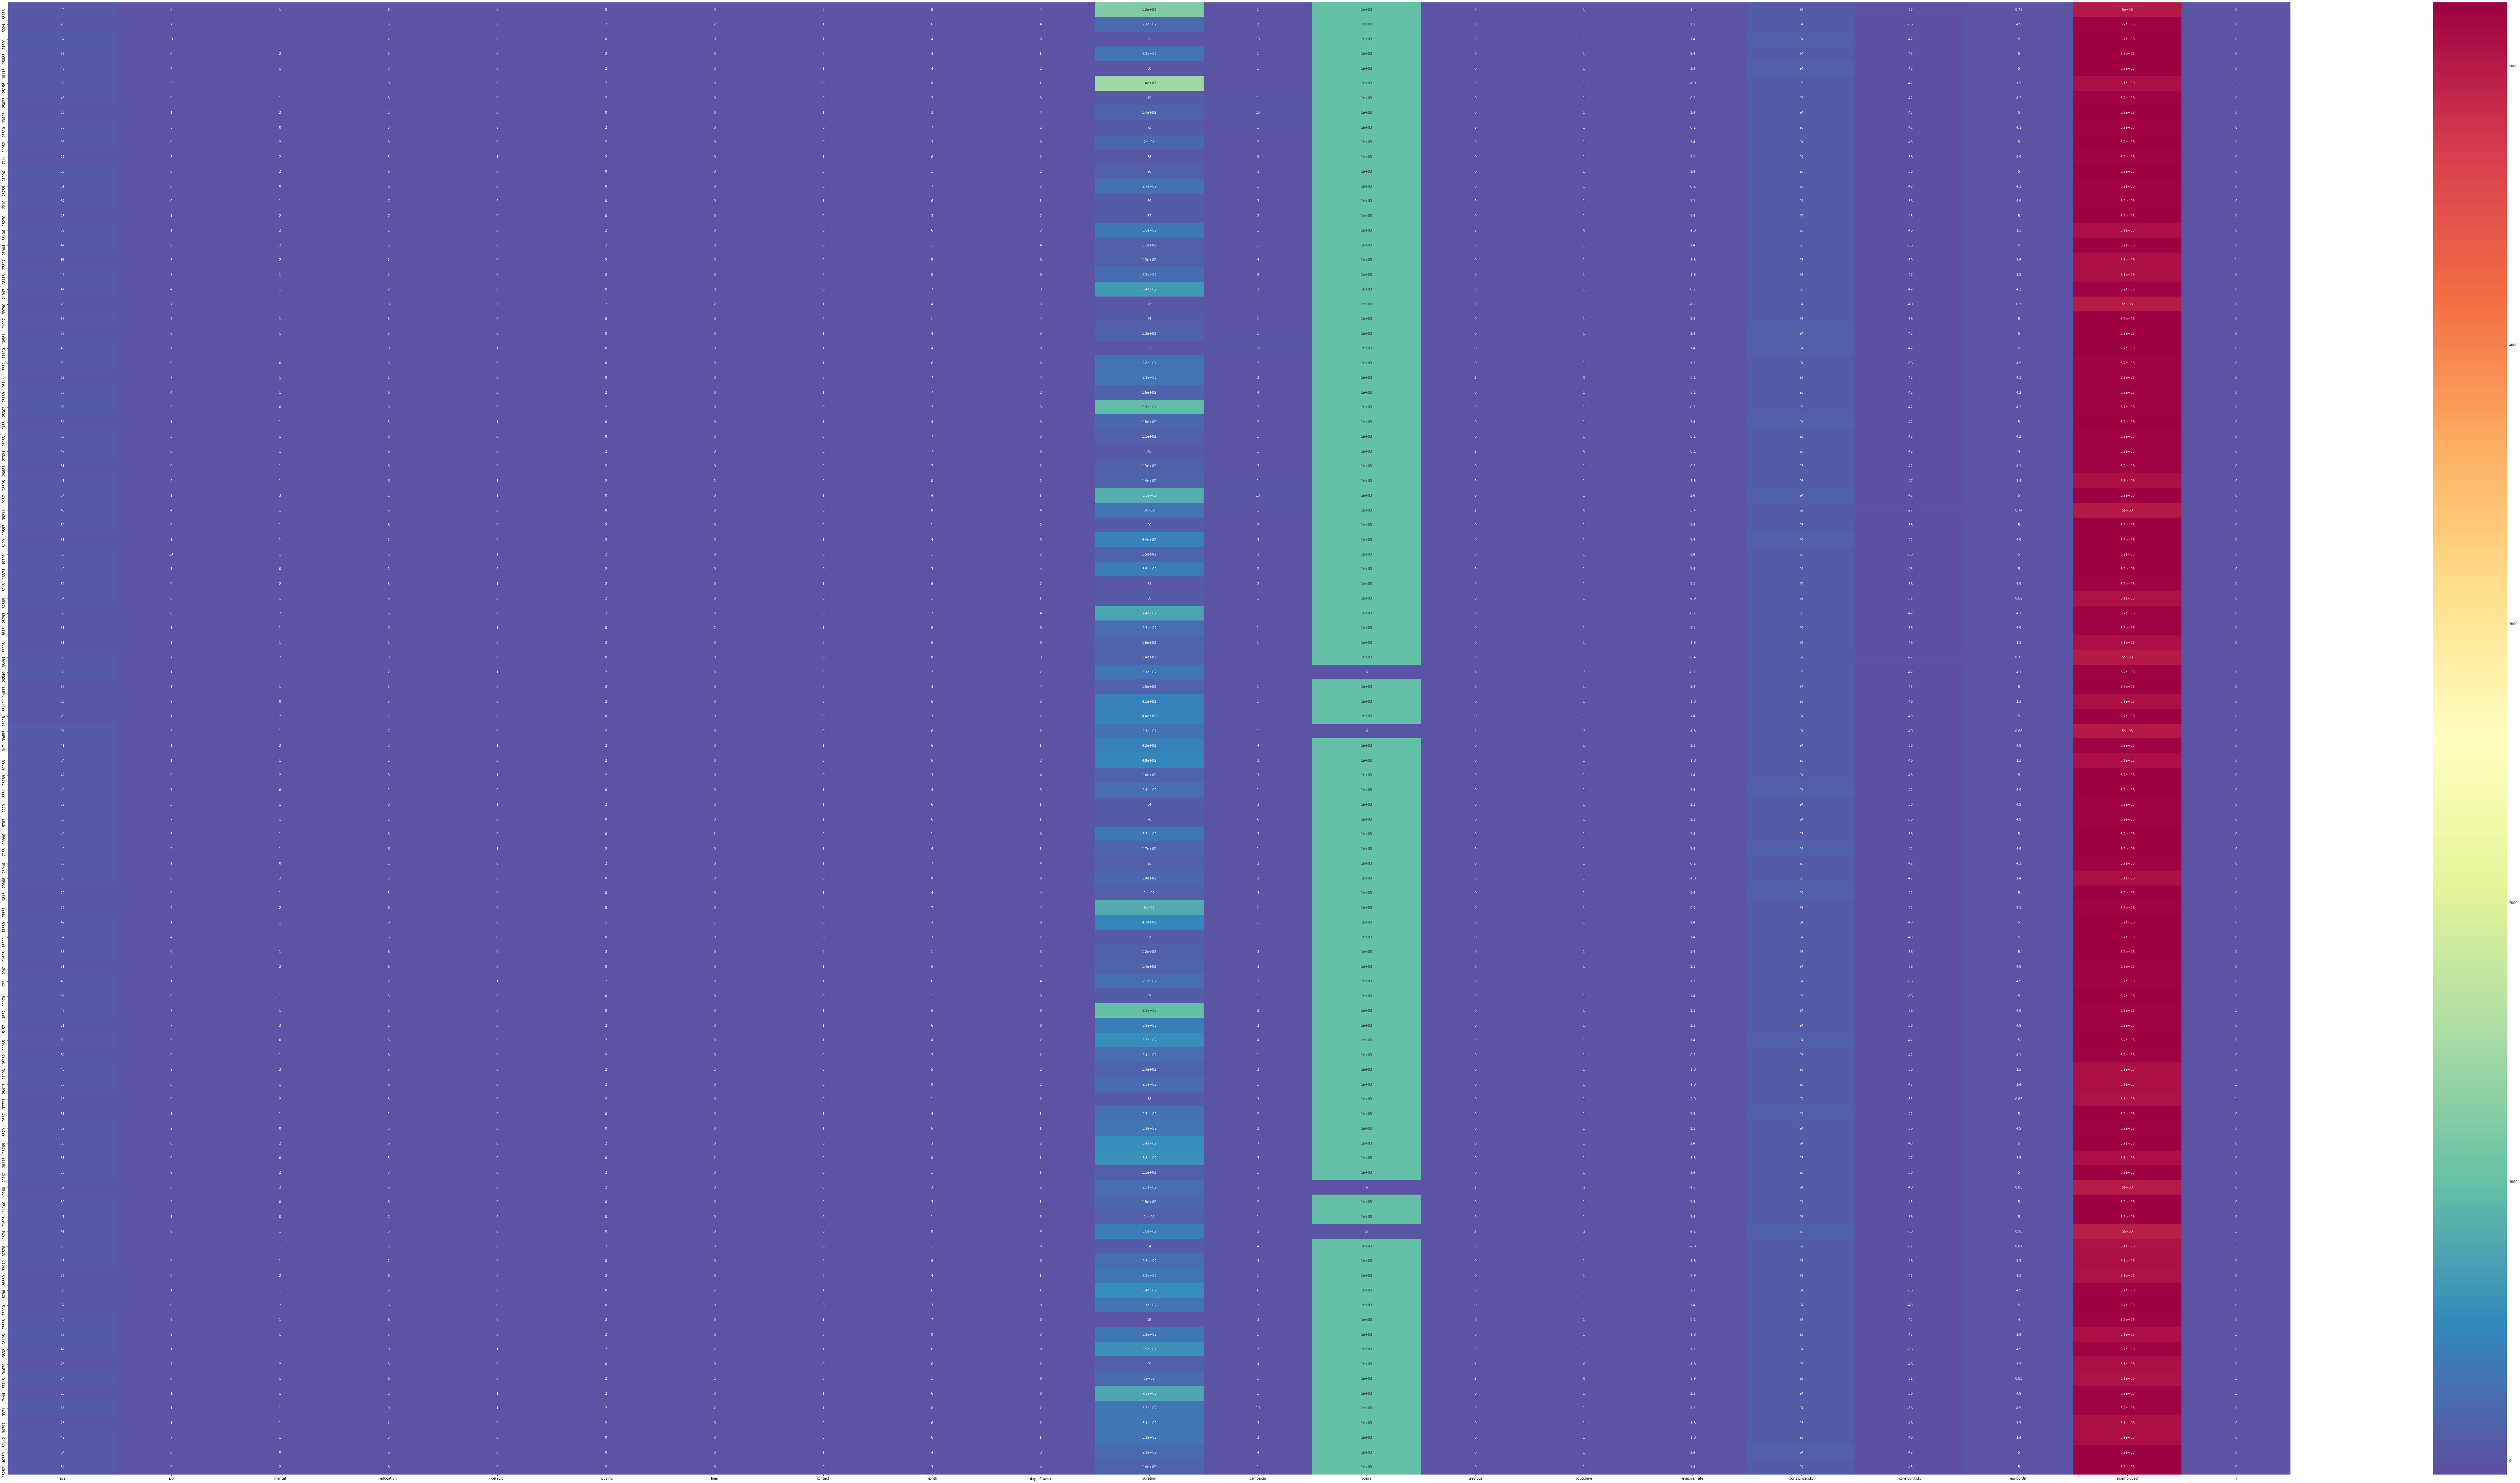

In [12]:
plt.figure(figsize=(151,80))
sns.heatmap(data=mydata.sample(100),annot=True,cmap='Spectral_r')

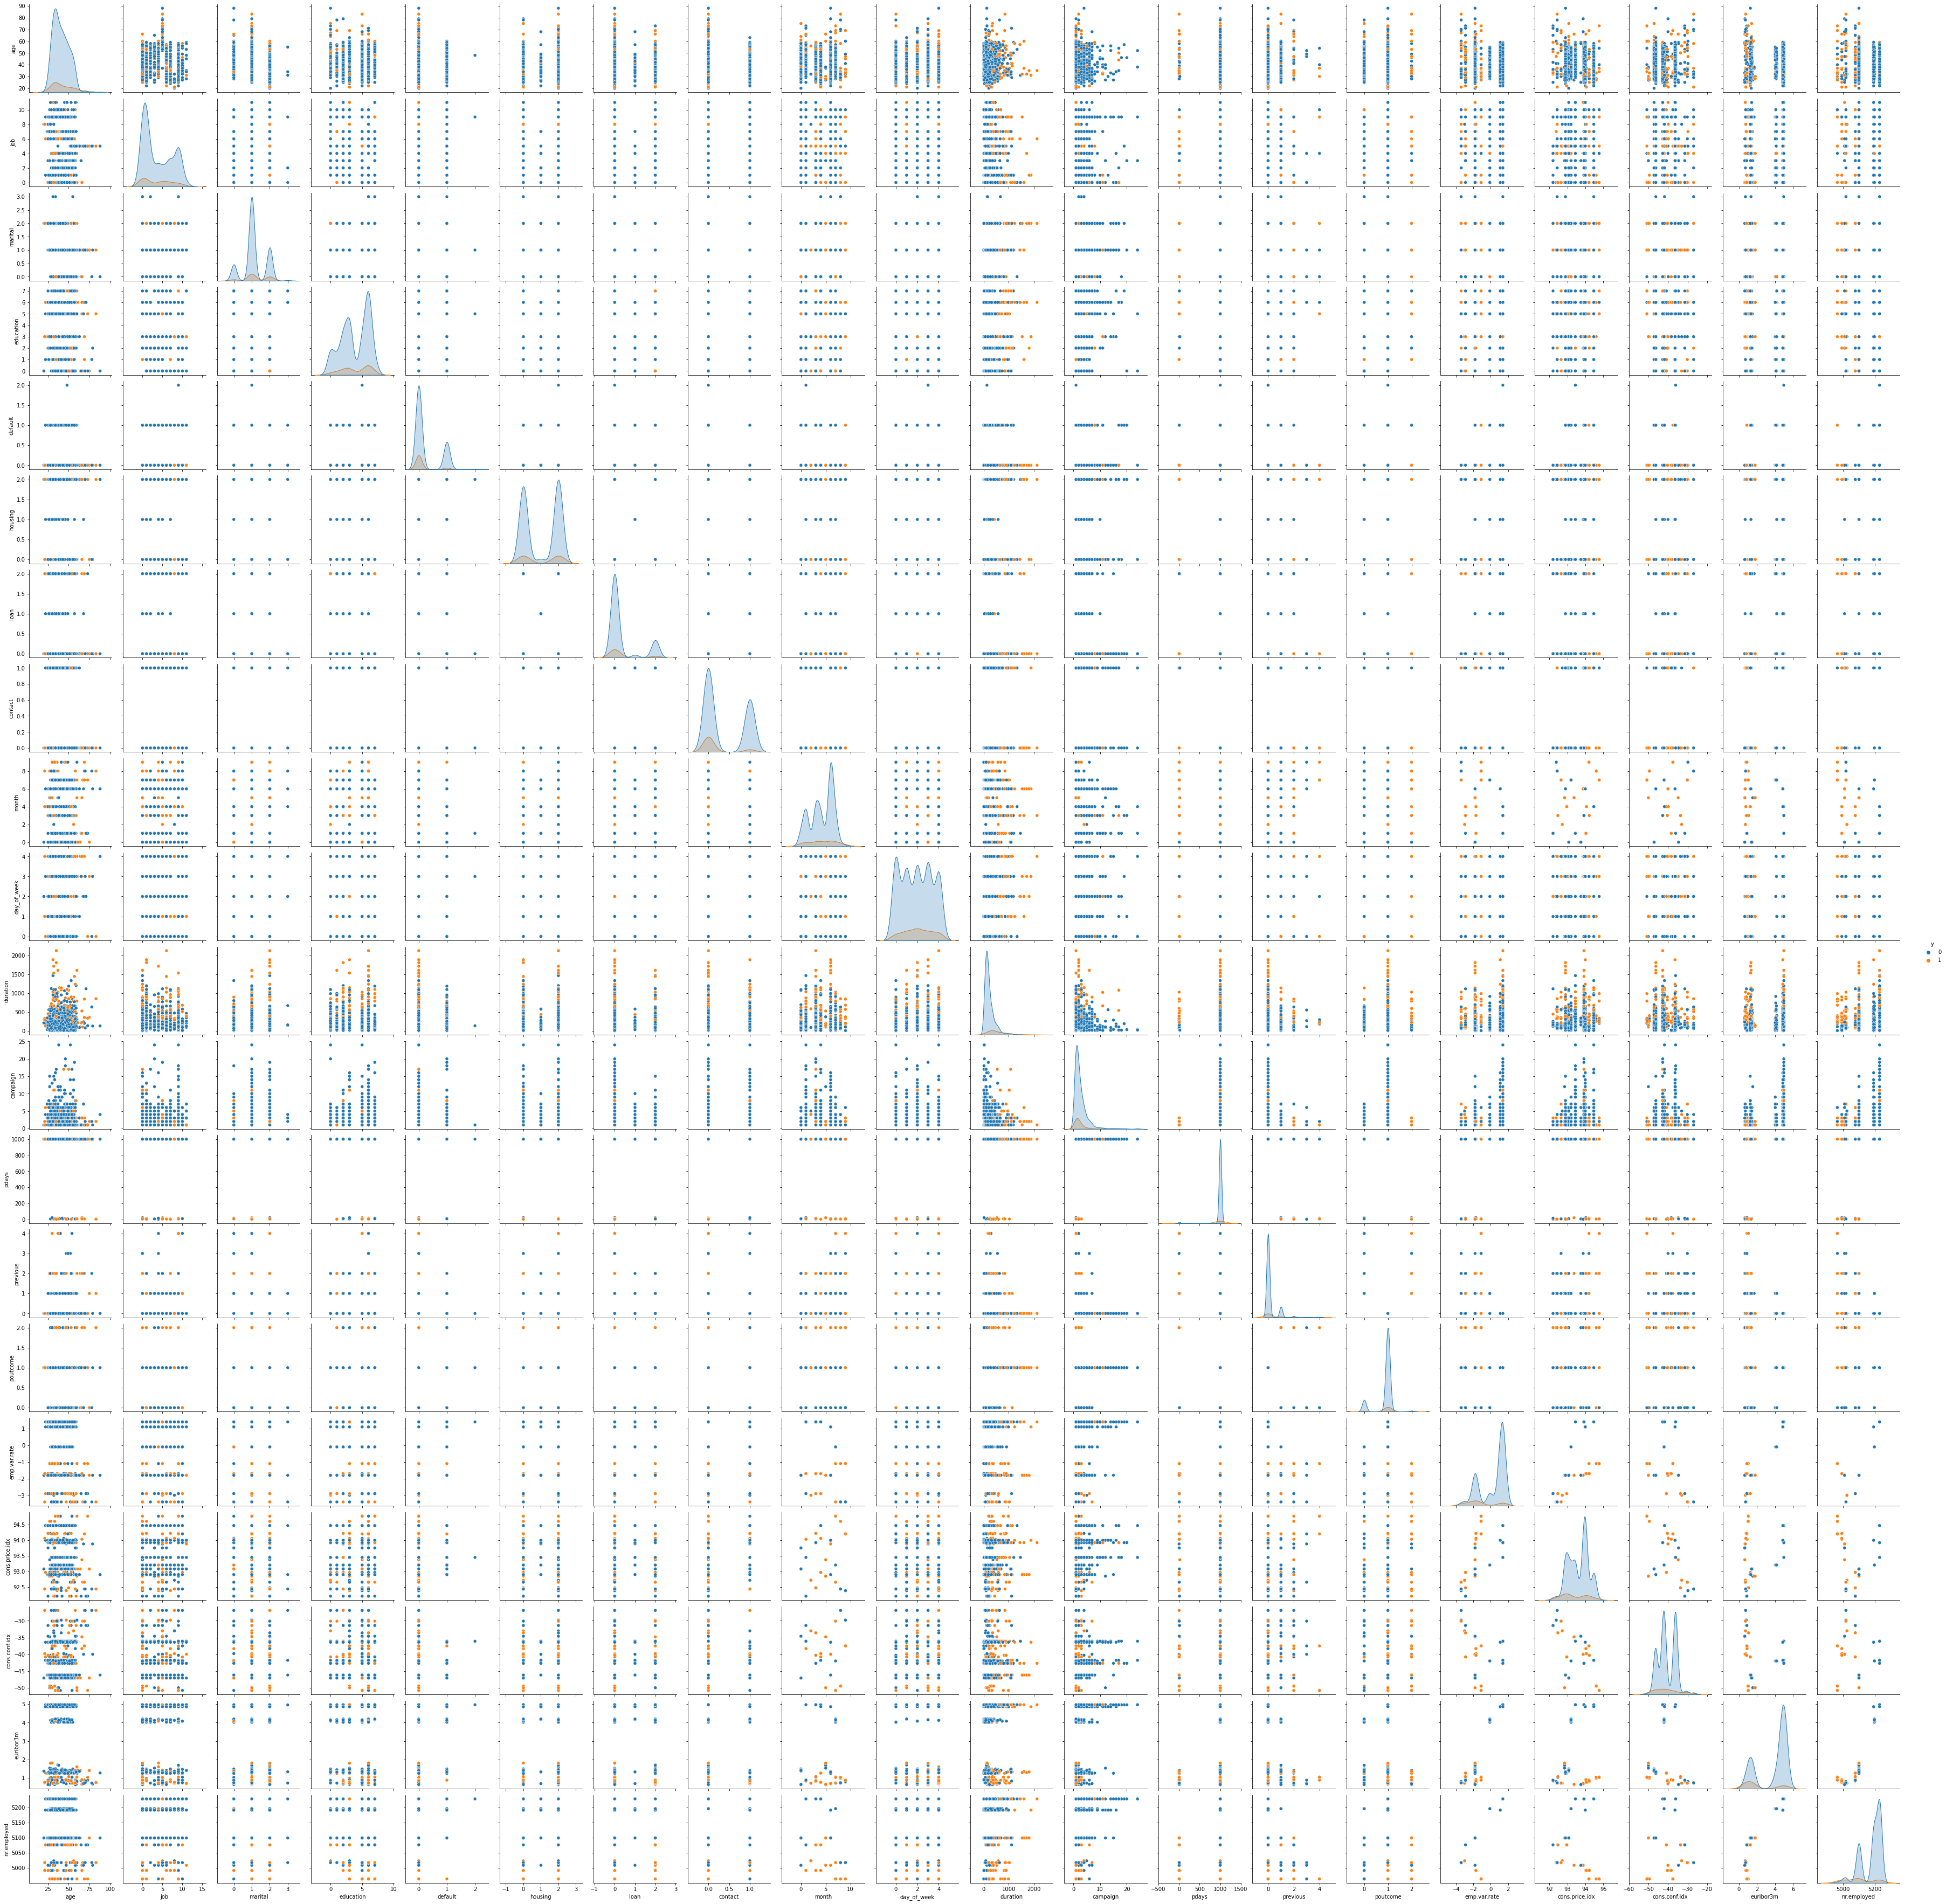

In [13]:
sns.pairplot(mydata.sample(1000), kind='scatter', hue='y');

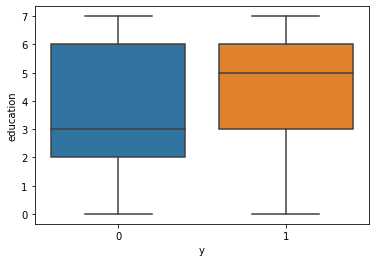

In [14]:
sns.boxplot(x="y",y="education",data=mydata.sample(2000));

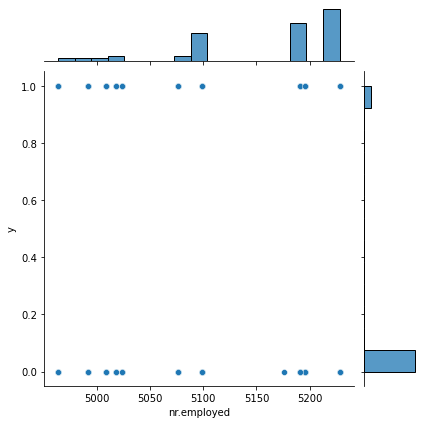

In [15]:
sns.jointplot(x='nr.employed',y="y",data=mydata.sample(4000));

C:\Users\SHYAM\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1080x576 with 0 Axes>

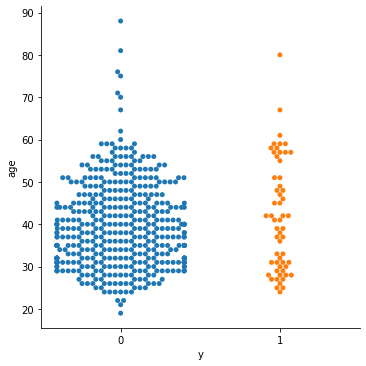

In [16]:
plt.figure(figsize=(15,8))
sns.catplot(x='y',y='age',kind='swarm',data=mydata.sample(500));
plt.show()

# Declaring Dependent and Independent Variables

In [17]:
y_dep = mydata.y

In [18]:
x_ind = mydata.drop("y",axis=1)

# Importing Train Test Split

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x_ind,y_dep,test_size=0.2,random_state=2)

# Standardizing the Data in X_train and X_test

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
norm=StandardScaler()

In [23]:
x_train = norm.fit_transform(x_train)

In [24]:
x_test = norm.fit_transform(x_test)

# Importing SVC

In [25]:
from sklearn.svm import SVC

In [26]:
model = SVC(kernel='linear')

In [27]:
fit_model = model.fit(x_train,y_train)

In [28]:
y_pred=fit_model.predict(x_test)

In [29]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

# Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [31]:
confusion_matrix(y_test,y_pred)

array([[7188,  130],
       [ 660,  260]], dtype=int64)

# Accuracy Score

In [32]:
accuracy_score(y_test,y_pred)

0.9041029376062151

# The Accuracy of the model using Linear Kernel is 90.41%

# Classification Report

In [33]:
from sklearn.metrics import classification_report

In [34]:
c_Report=classification_report(y_test,y_pred)

In [35]:
print(c_Report)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7318
           1       0.67      0.28      0.40       920

    accuracy                           0.90      8238
   macro avg       0.79      0.63      0.67      8238
weighted avg       0.89      0.90      0.89      8238



# Finding which group has more support points

In [36]:
fit_model.n_support_

array([3355, 3342])

# Finding the best fit kernel for the given dataset 

In [37]:
kernel = ['linear','rbf','poly','sigmoid']

In [38]:
for i in kernel:
    model1=SVC(kernel=i)
    model1=model1.fit(x_train,y_train)
    print("Kernel: ",i)
    print("ACC score: ",accuracy_score(y_test,model1.predict(x_test)))

Kernel:  linear
ACC score:  0.9041029376062151
Kernel:  rbf
ACC score:  0.9101723719349356
Kernel:  poly
ACC score:  0.9088370963826171
Kernel:  sigmoid
ACC score:  0.8630735615440641


# The Accuracy of the model after checking with different types of kernel is 91.01%

# The best fitted kernel is RBF and the Accuracy score is 91.01%

Therefore the model is considered to be a Good Model